# Spam E-mail Classifier using Naive Bayes Classifier

Goal is to design such a spam filter that can be used in the real-world easily to tag emails as spam or not spam. As you might have seen in your mail inboxes, few e-mails automatically get tagged/dumped into the Spam section. In this notebook, I explore how this filter is made. In order to do this, I require some data beforehand containing both spam and not spam e-mails using which I will be able to train a classifier. The classifier can then be used on new unseen mail texts to determine if they are spam or not spam. 

The dataset I use for this contains 5,728 different mails (text) along with their tag- spam or not spam.

#### Procedure followed in the Notebook:

Prepared mail text data by cleaning: removed punctuations and stopwords. I then converted the email texts into vectors using Count Vectorizer, after which the data in fit into a Multinomial Naive Bayes Classifier to train the model. Test data set is then used on this trained classifer to obtain spam or not spam label outputs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

## Load and Explore the dataset

In [2]:
mail_df = pd.read_csv("emails.csv")

In [3]:
mail_df.shape

(5728, 2)

In [4]:
mail_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
mail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
mail_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
mail_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [8]:
mail_df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: * special notification * aurora versi...    2
1     1368   1368  Subject: naturally irresistible your corporate...    1

In [9]:
#find length of each texts
mail_df['length'] = mail_df['text'].apply(len)

In [10]:
mail_df

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [11]:
mail_df.length.describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

<AxesSubplot:ylabel='Frequency'>

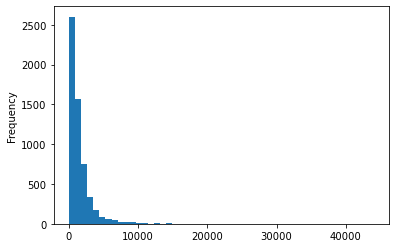

In [12]:
mail_df['length'].plot(bins=50, kind='hist') 

In [13]:
#displaying few mails
mail_df[mail_df['length'] == 43952]['text'].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

In [14]:
mail_df[mail_df['length'] == 13]['text'].iloc[0]

'Subject: fyi '

In [15]:
not_spam = mail_df[mail_df['spam']==0]

In [16]:
spam = mail_df[mail_df['spam']==1]

In [17]:
not_spam

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [18]:
spam

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


<AxesSubplot:ylabel='Frequency'>

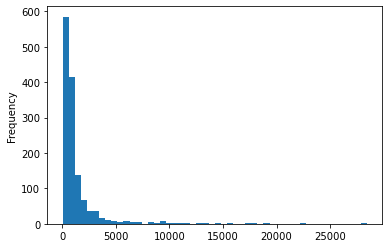

In [19]:
spam['length'].plot(bins=50, kind='hist') 

<AxesSubplot:ylabel='Frequency'>

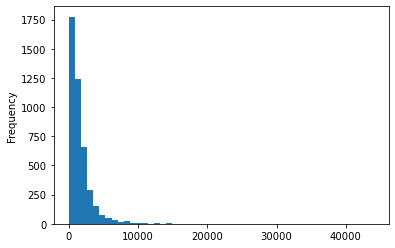

In [20]:
not_spam['length'].plot(bins=50, kind='hist') 

### Can conlude here that lengths of the texts of e-mails do not help much in determining if they are spam or not

/Users/vraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spam', ylabel='count'>

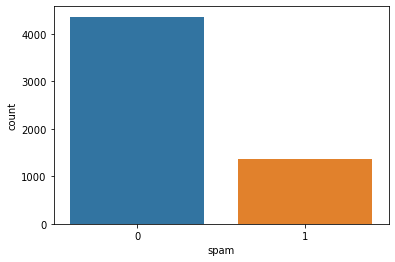

In [21]:
sns.countplot(mail_df['spam'], label = "Count") 

Another thing to note here is that the data seems to be unbalanced, number of examples of spam mails are a lot less than number of samples of non spam mails

Naive Bayes Classifiers perform well on such unbalanced datasets, so lets build a Naive Bayes Classifier and train it, But first, clean the text.

## Clean data, Prepare data and split into training and test sets

- remove punctuations
- stopwords removal
- applying countvectorizer

Sentences generally contain puncatuations and stop words (and, the, a etc) which do not add much value for a Machine Learning model to train on. Such punctuations and stop words are not important while training our model/classifier, so I remove these from the texts. 

Text cleaning is an important step in the data preparation prcoess. In order to achieve this, I define two individual functions to carry out two important data cleaning tasks: 
1. remove punctuations 
2. remove stopwords

In [22]:
#function to remove punctuations
def remove_punctuations(text):
    punctuations = re.compile(r'[^\w\s]') #defining a regex for punctuations
    text = punctuations.sub(r'', text)
    return text

In [23]:
stopwords = stopwords.words('english') #list of stopwords

#function to remove stopwords
def remove_stopwords(text):
    final_text =[]
    for i in text.split():
        if i.strip().lower() not in stopwords and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
            
    return " ".join(final_text)

In [24]:
#apply punctuation removal function to entire mail_df
mail_df['text'] = mail_df['text'].apply(remove_punctuations)

In [25]:
#apply stopword removal function to entire mail_df
mail_df['text'] = mail_df['text'].apply(remove_stopwords)

In [26]:
print(mail_df['text'][0])

subject naturally irresistible corporate identity lt really hard recollect company market full suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website make task much easier promise havinq ordered iogo company automaticaily become world ieader isguite ciear without good products effective business organization practicable aim hotat nowadays market promise marketing efforts become much effective list clear benefits creativeness hand made original logos specially done reflect distinctive company image convenience logo stationery provided formats easy use content management system letsyou change website content even structure promptness see logo drafts within three business days affordability marketing break make gaps budget satisfaction guaranteed provide unlimited amount changes extra fees surethat love result collaboration look portfolio interested


### Now, applying Count-vectorizer 

In [27]:
vectorizer = CountVectorizer()

In [28]:
mail_text_df = vectorizer.fit_transform(mail_df['text'])

In [29]:
print(vectorizer.get_feature_names())

['aa', 'aaa', 'aaaenerfax', 'aadedeji', 'aagrawal', 'aal', 'aaldous', 'aaliyah', 'aall', 'aanalysis', 'aaron', 'aawesome', 'ab', 'aba', 'abacha', 'abacus', 'abahy', 'abaixo', 'abandon', 'abandoned', 'abandonment', 'abargain', 'abarr', 'abattoir', 'abb', 'abbas', 'abbestellen', 'abbott', 'abbreviated', 'abbreviation', 'abc', 'abcsearch', 'abdalla', 'abdallat', 'abdelnour', 'abdul', 'abdulla', 'abdullah', 'abeis', 'abel', 'abello', 'abels', 'aber', 'abernathy', 'abetted', 'abeyance', 'abf', 'abhay', 'abide', 'abidjan', 'abiiity', 'abilene', 'abilities', 'ability', 'abit', 'abitibi', 'abklaeren', 'abl', 'able', 'abler', 'abliged', 'ablx', 'ably', 'abn', 'abnegate', 'abnormal', 'abnormality', 'aboard', 'abolish', 'abondantly', 'abook', 'aboriginal', 'abormalities', 'abort', 'abortive', 'abouts', 'aboutthis', 'aboutus', 'aboutvenita', 'aboveground', 'abovenet', 'abovetelefax', 'abqewvbgf', 'abr', 'abraham', 'abramov', 'abramowicz', 'abrams', 'abrasive', 'abreast', 'abreo', 'abridged', 'abro

/Users/vraj/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
print(mail_text_df.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
mail_text_df.shape

(5728, 33572)

## Train and test the model

### Define the features and labels, and split into training and testing data

In [32]:
X = mail_text_df
y = mail_df['spam']

In [33]:
X.shape

(5728, 33572)

In [34]:
y.shape

(5728,)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

## Evaluating the classifier

<AxesSubplot:>

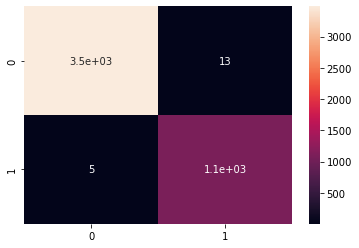

In [37]:
predict_train = model.predict(X_train)
cm = confusion_matrix(y_train, predict_train)
sns.heatmap(cm, annot=True)

<AxesSubplot:>

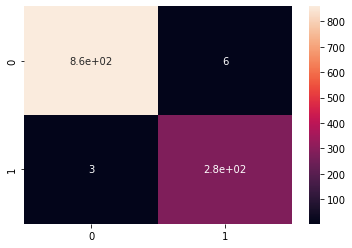

In [38]:
#predicting the test set results
predict_test = model.predict(X_test)
cm = confusion_matrix(y_test, predict_test)
sns.heatmap(cm, annot=True)

In [39]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       865
           1       0.98      0.99      0.98       281

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

